In [19]:
import airfoils as af
import matplotlib.pyplot as plt
import numpy as np
import potential as pot

# Airfoil

(-0.05, 1.05, -0.02690599321712555, 0.10552860438127433)

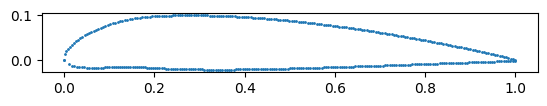

In [20]:
airfoil = af.Airfoil.NACA4("2412", n_points=200)
af_xs, af_ys = airfoil.all_points
plt.scatter(af_xs, af_ys, 1)
plt.axis('scaled')

# Wing Geometry

In [21]:
# Discretization
N = 50
M = 3

In [22]:
span = 6
spanDist = np.linspace(0, span, N)
chordDist = np.ones(N)
diheDist = np.zeros(N)
sweepDist = np.zeros(N)

wakeDist = 20 * chordDist

In [23]:
Umag = 16
alpha = 2 * np.pi/180
beta = 0
Uinf = Umag * np.cos(alpha) * np.cos(beta)
Vinf = Umag * np.cos(alpha) * np.sin(beta)
Winf = Umag * np.sin(alpha) * np.cos(beta)
Qinf = np.array((Uinf, Vinf, Winf))

In [24]:
dens = 1.2
wind = np.empty((N, M))
alpha0 = -2 * np.pi / 180

# Panel Wing And HorseShoe Wake

panels (3, 3, 50)


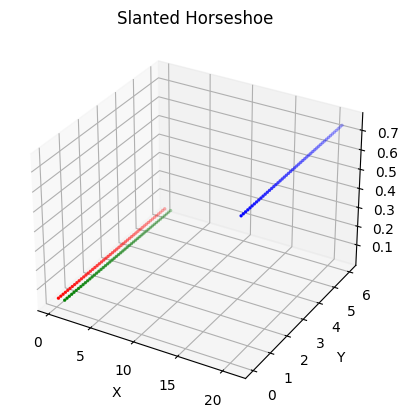

In [25]:
xs = np.empty((M, N))
ys = np.empty((M, N))
zs = np.empty((M, N))

xs[0, :] = sweepDist + chordDist/4
xs[1, :] = sweepDist + chordDist
xs[2, :] = xs[1, :] + wakeDist

ys[0, :] = sweepDist + spanDist 
ys[1, :] = sweepDist + spanDist
ys[2, :] = sweepDist + spanDist 


zs[0, :] = diheDist + airfoil.camber_line(chordDist / 4)
zs[1, :] = diheDist + airfoil.camber_line(chordDist/ 4) 
zs[2, :] = zs[1, :] + wakeDist * np.sin(alpha)

panels = np.array((xs, ys, zs))

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(xs[0,:], ys[0,:], zs[0,:], marker='.', color = 'r',linewidths=0.1)
ax.scatter(xs[1,:], ys[1,:], zs[1,:], marker='.', color = 'g',linewidths=0.1)
ax.scatter(xs[2,:], ys[2,:], zs[2,:], marker='.', color = 'b',linewidths=0.1)

ax.set_title("Slanted Horseshoe")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
print(f"panels {panels.shape}")

In [27]:
nj = np.repeat([(np.sin(alpha) * np.cos(beta),
                 np.cos(alpha) * np.sin(beta),
                 np.cos(alpha) * np.cos(beta))], (N-1)*(M-1), axis=0)

## Solve

In [29]:
a = np.zeros(((N-1)*(M-1), (N-1)*(M-1)))
b = np.zeros(((N-1)*(M-1), (N-1)*(M-1)))

RHS = np.zeros((N-1)*(M-1))
w_ind = np.zeros((N-1,3))
L_pan = np.zeros((N-1))
D_pan = np.zeros((N-1))

for k in np.arange(0, M-1):
    for i in np.arange(0, N-1):
        RHS[i] = np.pi * (alpha - alpha0) * chordDist[i] * Umag
        for j in np.arange(0, N-1):
                if k < M-2:
                    U, Ustar = pot.voring((xs[0, i] + xs[0, i+1])/2,
                                    (ys[0, i] + ys[0, i+1])/2,
                                    (zs[0, i] + zs[0, i+1])/2,
                                    k,j, panels)
                    a[i+k*(N-2), j+k*(N-2)] = - np.dot(nj[i],U) * chordDist[i] * np.pi
        a[i+k*(N-2), N-2 - i]  = 1
        a[i+k*(N-2), i+k*(N-2)]  =  a[i+k*(N-2), i+k*(N-2)]  + 1

Gammas = np.linalg.solve(a, RHS)
# w_ind = np.matmul(b_np,Gammas.T)

for i in np.arange(0, N-1):
    L_pan[i] =  dens * Umag  * Gammas[i] * (ys[0, i+1] - ys[0, i])
    # D_pan[i] = - dens * w_ind[i] * Gammas[i] * (ys[0, i+1] - ys[0, i])
L_PANEL = np.sum(L_pan,axis=0)
D_PANEL = np.sum(D_pan)

LinAlgError: Singular matrix

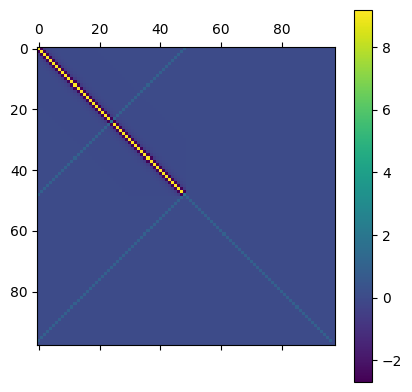

In [30]:
plt.matshow(a)
plt.colorbar()

In [31]:
print(f'Lift is: {L_PANEL}\t|\tDrag is: {"?"}')

NameError: name 'L_PANEL' is not defined